# Bayesian Regression

In [24]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import math

In [2]:
# covariance matrix of posterior Gaussian distribution
def gauss_cov(β, Φ, S_0):
    # return S_0 - β * np.dot(np.dot(S_0, Φ), np.dot(np.transpose(Φ), S_0)) / (1 + β * np.dot(np.dot(np.transpose(Φ), S_0), Φ))
    return inv(inv(S_0) + β * np.dot(np.transpose(Φ), Φ))

In [3]:
# mean of posterior Gaussian distribution
def gauss_mean(β, Φ, S_0, t, m_0):
    return np.dot(gauss_cov(β, Φ, S_0), β * np.dot(np.transpose(Φ), t) + np.dot(inv(S_0), m_0))

In [39]:
def draw_2D_gaussian(ax, mean, cov):
    [x, y] = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    gauss = multivariate_normal(mean, cov)
    ax.contourf(x, y, gauss.pdf(pos))
    ax.set_xlabel("w_0")
    ax.set_ylabel("w_1")

In [5]:
def linear_func(w_0, w_1, x):
    n = np.shape(x)[0]
    return np.ones(n,) * w_0 + x * w_1

In [38]:
def sampled_graphs(ax, mean, cov, n, seen_points):
    points = np.random.multivariate_normal(mean, cov, size=n)
    x = np.linspace(-1, 1, 100)
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    for i in range(n):
        (w_0, w_1) = points[i]
        y = linear_func(w_0, w_1, x)
        ax.plot(x, y, color='y')
    for (x, y) in seen_points:
        ax.plot(x, y, 'ro')
    ax.set_xlabel("x")
    ax.set_ylabel("y")

In [7]:
def gauss_l(β, t, x, w):
    n = np.shape(w)[0]
    return math.sqrt(β/(2 * math.pi)) * math.exp( - (β/2) * (t - np.dot(w,x))**2)
    # return math.sqrt(β/(2 * math.pi)) * np.vectorize(math.exp) (-(β/2) * np.multiply(t * np.ones(n,) - np.dot(w, x), t * np.ones(n,) - np.dot(w, x)))

In [35]:
def draw_likelihood(ax, β, t, x):
    [x_, y_] = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x_, y_))
    def gauss_ll(w):
        return gauss_l(β, t, x, w)
    z_ = np.zeros((200, 200))
    for i in range(200):
        for j in range(200):
            # print(pos[i, j])
            # print(gauss_ll(pos[i, j]))
            z_[i, j] = gauss_ll(pos[i, j])
    ax.contourf(x_, y_, z_)
    ax.set_xlabel("$w_0$")
    ax.set_ylabel("$w_1$")

In [9]:
def draw_one_line(ax1, ax2, ax3, β, new_label, new_x, mean, cov, seen_points, likelihood_flag):
    if likelihood_flag:
        draw_likelihood(ax1, β, new_label, new_x)
    draw_2D_gaussian(ax2, mean, cov)
    sampled_graphs(ax3, mean, cov, 40, seen_points)

In [10]:
def draw_random_sample(w_0, w_1, β):
    x = np.random.random() * 2 - 1
    t = w_0 + w_1 * x + np.random.normal(loc=0, scale=(1/math.sqrt(β)))
    return (x, t)

## Sequential Bayesian Learning

As can be seen from graphs above, sequential bayesian regression seem to be computationally unstable


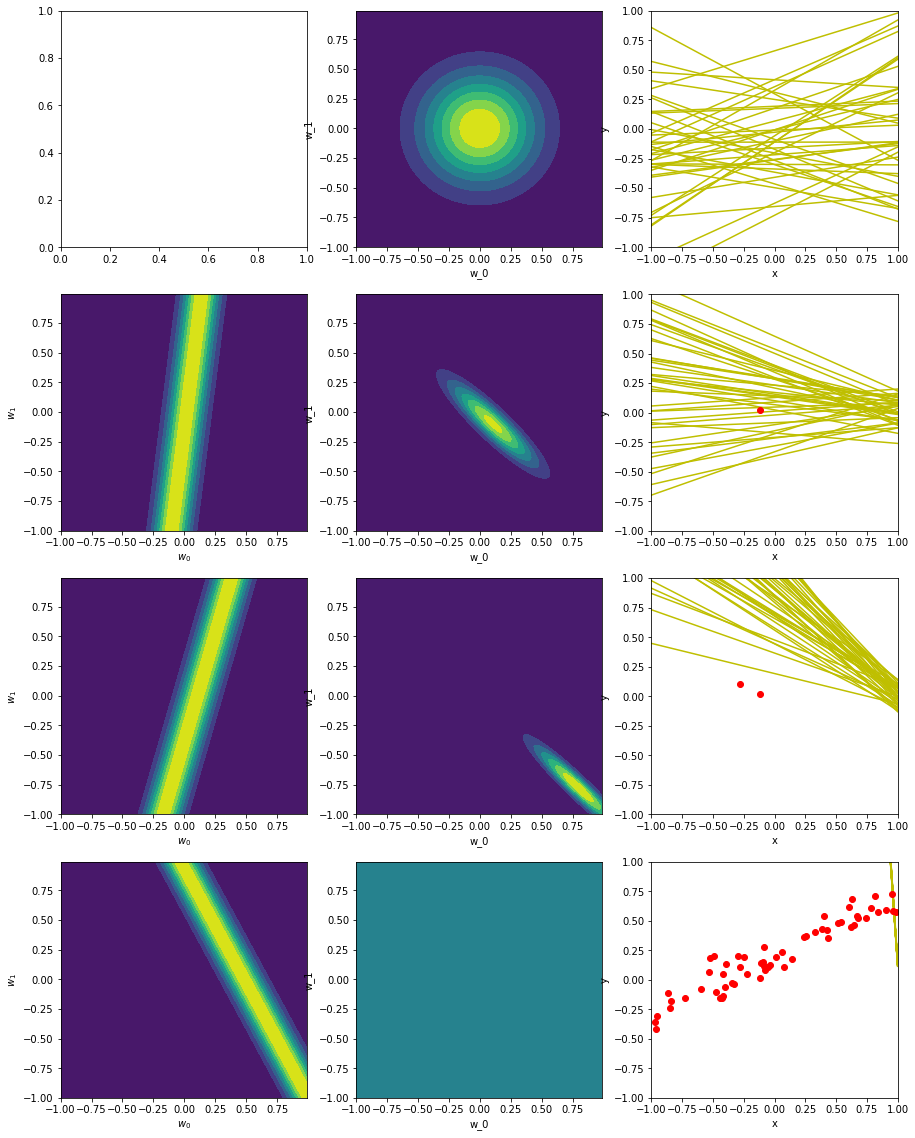

In [41]:
mean = np.array([0, 0])
cov = np.array([[0.1, 0], [0, 0.1]])
seen_points = []
β = 100
fig, ax = plt.subplots(4, 3, figsize = (15, 20))
counter = 0
print("As can be seen from graphs above, sequential bayesian regression seem to be computationally unstable")
for i in range(60):
    # print(i)
    likelihood_flag = True
    (new_x, new_t) = draw_random_sample(0.2, 0.5, β)
    # print(new_x, new_t)
    if i==0:
        likelihood_flag = False
    else:
        seen_points.append((new_x, new_t))
        new_x = np.array([1, new_x])
        new_cov = gauss_cov(β, new_x, cov)
        new_mean = gauss_mean(β, new_x, cov, new_t, mean)
        mean = new_mean
        cov = new_cov
    if i in [0, 1, 2, 59]:
        draw_one_line(ax[counter, 0], ax[counter, 1], ax[counter, 2], β, new_t, new_x, mean, cov, seen_points, likelihood_flag)
        counter += 1
fig.savefig("seq_bayesl.eps")

## Recomputing mean and covariance from scratch 

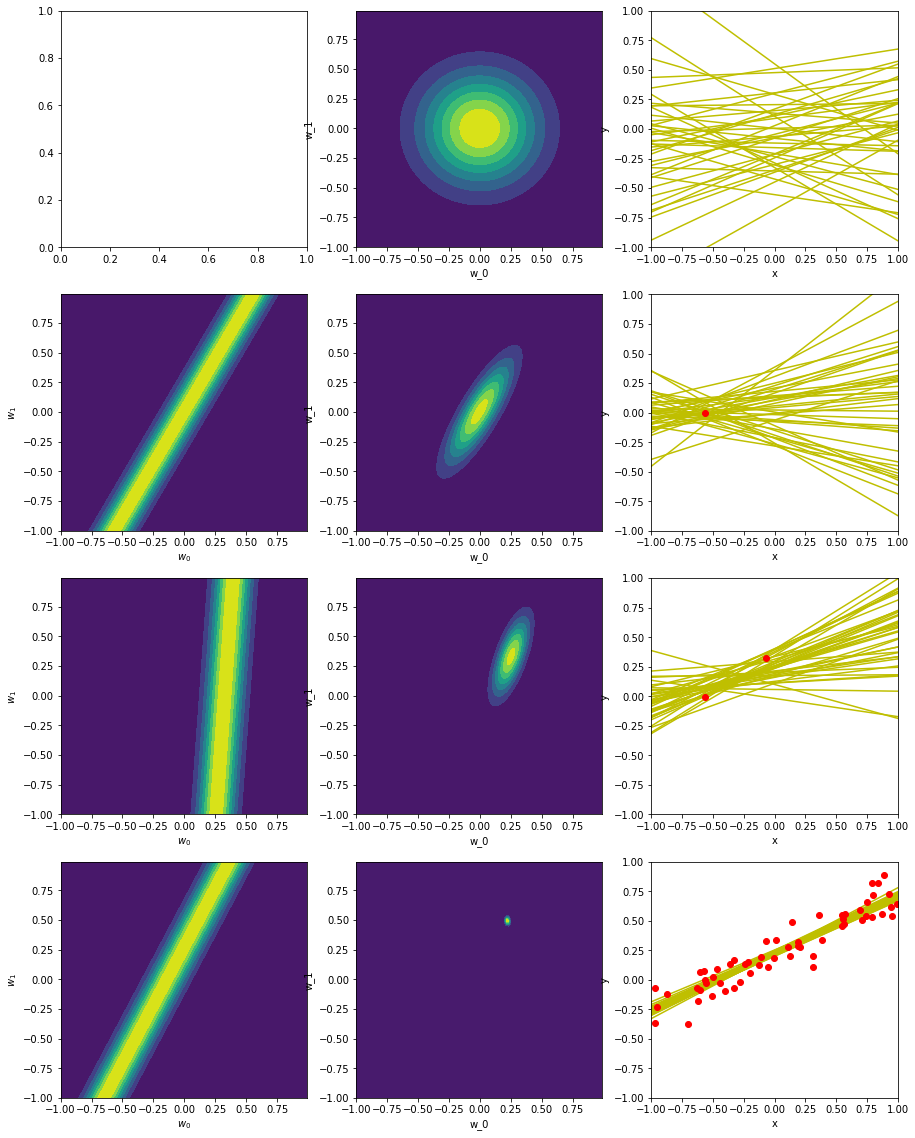

In [42]:
mean = np.array([0, 0])
cov = np.array([[0.1, 0], [0, 0.1]])
new_mean = mean
new_cov = cov
seen_points = []
Φ = []
labels = []
β = 100
counter = 0
fig, ax = plt.subplots(4, 3, figsize = (15, 20))
for i in range(60):
    likelihood_flag = True
    (new_x, new_t) = draw_random_sample(0.2, 0.5, β)
    if i==0:
        likelihood_flag = False
    else:
        seen_points.append((new_x, new_t))
        new_x = np.array([1, new_x])
        Φ.append(new_x)
        labels.append(new_t)
        new_cov = gauss_cov(β, Φ, cov)
        new_mean = gauss_mean(β, Φ, cov, labels, mean)
    if i in [0, 1, 2, 59]:
        draw_one_line(ax[counter, 0], ax[counter, 1], ax[counter, 2], β, new_t, new_x, new_mean, new_cov, seen_points, likelihood_flag)
        counter += 1
        # print(new_mean)
        # print(new_cov)
fig.savefig("bayesL.eps")